In [132]:
import pandas as pd

train_df = pd.read_csv("esun_train.csv",encoding="utf-8")
test_df = pd.read_csv("test.csv",encoding="utf-8")
# train_df=test_df

In [133]:
# train_df = train_df.fillna("N")

In [100]:
# column=list(train_df.columns)
# column.remove("fraud_ind")
# print(column)
# train_df[["locdt","bad_percent_locdt"]].drop_duplicates(subset="locdt", keep='first', inplace=False)
# train_df[train_df.locdt==110]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,bad_percent_mcc,bad_percent_iterm,bad_percent_scity,bad_percent_stocn,bad_percent_hcefg,bad_percent_csmcu,bad_percent_stscd,bad_percent_locdt,bad_percent_loctm,bad_percent_conam


In [95]:
# test_df[test_df.locdt==102]
# test_df.locdt.value_counts()

115    15842
107    15480
91     15408
114    14959
95     14769
106    14649
108    14600
100    14552
116    14457
120    14395
94     14304
101    14215
93     14205
109    14185
103    14168
113    14147
118    14015
102    13893
99     13797
111    13768
105    13743
119    13710
110    13404
96     13267
104    13258
92     13128
117    13034
97     12941
112    12919
98     12453
Name: locdt, dtype: int64

In [134]:
# train_df["ecfg"] = train_df["ecfg"].apply(lambda x: 1 if x =='Y' else 0)
# train_df["flbmk"] = train_df["flbmk"].apply(lambda x: 1 if x =='Y' else 0)
# train_df["flg_3dsmk"] = train_df["flg_3dsmk"].apply(lambda x: 1 if x =='Y' else 0)
# train_df["insfg"] = train_df["insfg"].apply(lambda x: 1 if x =='Y' else 0)
# train_df["ovrlt"] = train_df["ovrlt"].apply(lambda x: 1 if x =='Y' else 0)

project=test_df
project["ecfg"] = project["ecfg"].apply(lambda x: 1 if x =='Y' else 0)
project["flbmk"] = project["flbmk"].apply(lambda x: 1 if x =='Y' else 0)
project["flg_3dsmk"] = project["flg_3dsmk"].apply(lambda x: 1 if x =='Y' else 0)
project["insfg"] = project["insfg"].apply(lambda x: 1 if x =='Y' else 0)
project["ovrlt"] = project["ovrlt"].apply(lambda x: 1 if x =='Y' else 0)

In [104]:

column=["acqic","contp","etymd","mchno","mcc","iterm",
        "scity","stocn","hcefg","csmcu","stscd","locdt","loctm",
        "conam"]
for col in column:
    bad_per="bad_percent_"+col
    test=train_df[[col,bad_per]].drop_duplicates(subset=col, keep='first', inplace=False)
#     col_count=train_df[col].value_counts()
#     bad=[]
    # 取出每個類別值，算出盜刷率
#     for i in col_count.index:
#         find=train_df[train_df[col]==i]
#         true=find[find.fraud_ind == 1]
#         present=len(true)/len(find)
#         bad.append(present)
#     cat="category_"+col
#     bad_per="bad_percent_"+col
#     test = pd.DataFrame(columns=[cat, bad_per])
#     test[cat]=col_count.index
#     test[bad_per]=bad
    # test.acount=col_count.values
    '''  >0.03 取盜刷率d大於百分之三的類別值，可以修改'''
    #test[test["bad_percent"]>0.03]
    #test.sort_values(by=['bad_percent'],ascending= False)

    #train_df["csmcu_bad"]=bad
    project=pd.merge(project,test, how='left',
                     left_on=col,right_on=col)

#     project=project.drop(columns=[cat])
    print(col)

acqic
contp
etymd
mchno
mcc
iterm
scity
stocn
hcefg
csmcu
stscd
locdt
loctm
conam


In [114]:
'''na都補0'''
# project=project.fillna(0.)
# print(project.isnull().any())

acqic                False
bacno                False
cano                 False
conam                False
contp                False
csmcu                False
ecfg                 False
etymd                False
flbmk                False
flg_3dsmk            False
hcefg                False
insfg                False
iterm                False
locdt                False
loctm                False
mcc                  False
mchno                False
ovrlt                False
scity                False
stocn                False
stscd                False
txkey                False
bad_percent_acqic    False
bad_percent_contp    False
bad_percent_etymd    False
bad_percent_mchno    False
bad_percent_mcc      False
bad_percent_iterm    False
bad_percent_scity    False
bad_percent_stocn    False
bad_percent_hcefg    False
bad_percent_csmcu    False
bad_percent_stscd    False
bad_percent_locdt    False
bad_percent_loctm    False
bad_percent_conam    False
dtype: bool


In [ ]:
# project=train_df
# column=["acqic","contp","etymd","mchno","mcc","iterm",
#         "scity","stocn","hcefg","csmcu","stscd","locdt","loctm",
#         "conam"]
# for col in column:
#     '''col是欄位，可以修改'''
# #     col="csmcu"
#     col_count=train_df[col].value_counts()
#     bad=[]
#     # 取出每個類別值，算出盜刷率
#     for i in col_count.index:
#         find=train_df[train_df[col]==i]
#         true=find[find.fraud_ind == 1]
#         present=len(true)/len(find)
#         bad.append(present)
#     cat="category_"+col
#     bad_per="bad_percent_"+col
#     test = pd.DataFrame(columns=[cat, bad_per])
#     test[cat]=col_count.index
#     test[bad_per]=bad
#     # test.acount=col_count.values
#     '''  >0.03 取盜刷率d大於百分之三的類別值，可以修改'''
#     #test[test["bad_percent"]>0.03]
#     #test.sort_values(by=['bad_percent'],ascending= False)

#     #train_df["csmcu_bad"]=bad
#     project=pd.merge(project,test, how='left',
#                      left_on=col,right_on=cat)

#     project=project.drop(columns=[cat])
#     print(cat)

In [ ]:
# project = project.drop(columns=['category_acqic', 'category_contp',
#        'category_etymd','category_mchno',  'category_mcc',
#        'category_iterm','category_scity',  'category_stocn',
#         'category_hcefg','category_csmcu',  'category_stscd',
#         'category_locdt','category_loctm',  'category_conam',])
# project.columns

In [135]:
train_df = train_df.drop(columns=["acqic","contp","etymd","mchno","mcc","iterm",
        "scity","stocn","hcefg","csmcu","stscd","locdt","loctm",
        "conam","bacno","cano","txkey","bad_percent_locdt"])

In [116]:
project = project.drop(columns=["acqic","contp","etymd","mchno","mcc","iterm",
        "scity","stocn","hcefg","csmcu","stscd","locdt","loctm",
        "conam","bacno","cano","txkey","bad_percent_locdt"])

In [118]:
# train_df.columns.drop("fraud_ind")

In [146]:
project.to_csv('esun_test_v1.csv', encoding='utf-8', index=False)
train_df.to_csv('esun_train_v1.csv', encoding='utf-8', index=False)

In [4]:
import pandas as pd
from datetime import datetime
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
import xgboost as xgb
import re
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

In [138]:
# data = pd.read_table("esun_train.csv", sep=",", encoding="utf-8")
# print(data.columns)

print(len(project.columns))
print(len(train_df.columns))

18
19


In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.drop(["fraud_ind"],axis=1)
                                                    , train_df["fraud_ind"], test_size=0.1) #, random_state=42

In [140]:
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(max_depth=5)
# clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

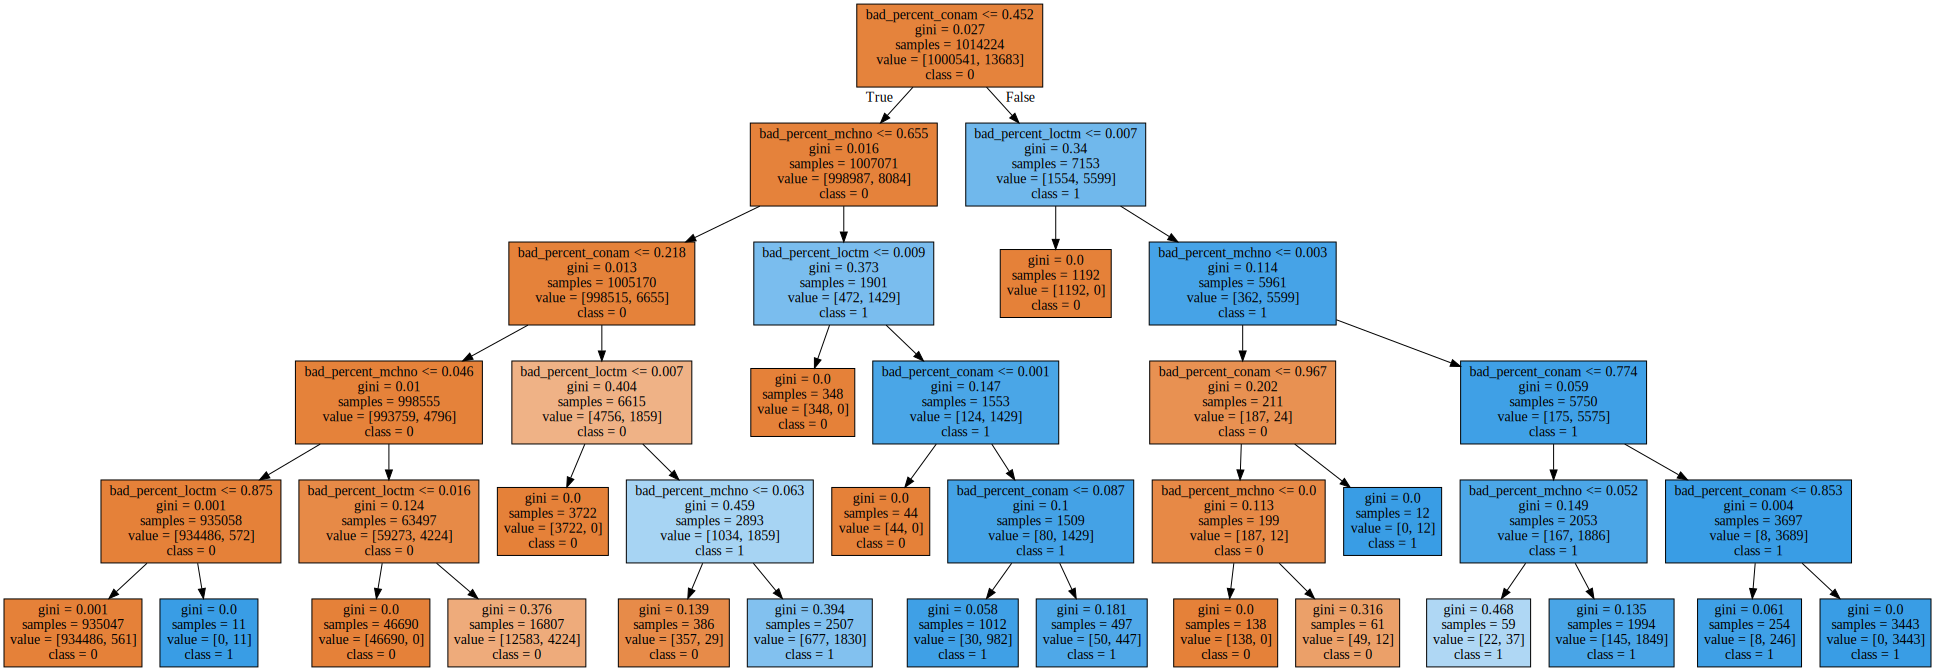

In [51]:
# from sklearn.tree import export_graphviz
# import graphviz
# g = export_graphviz(clf, feature_names=train_df.columns.drop("fraud_ind"),
#                     class_names=["0","1"], filled=True)
# graphviz.Source(g)

In [141]:
# from sklearn.metrics import *
# pre = clf.predict(X_test)
# # print("預測:", list(pre))
# # print("正確:", list(y_test))
# print("正確率:", accuracy_score(pre, y_test))

# print("f1:",f1_score(y_test, pre, average='weighted'))


正確率: 0.9941078337415256
f1: 0.9935957237218269


In [145]:
# from sklearn.metrics import *
# project_pre = clf.predict(project)

# pd.Series(project_pre).value_counts()


0    420880
1       785
dtype: int64

In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scale = scaler.fit_transform(X_train)
x_test_scale = scaler.transform(X_test)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
clf.fit(x_train_scale, y_train)
# result = pd.DataFrame()
# pid = test_df["PassengerId"]
pre = clf.predict(x_test_scale)

f1_score(y_test, pre, average='weighted')
# result["PassengerId"] = pid
# result["Survived"] = pre
# result.to_csv("titanic_knn.csv", index=False)
# result

In [ ]:
from sklearn.cross_validation import train_test_split

# train_x, test_x, train_y, test_y = train_test_split(data, label, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(train_df.drop(["fraud_ind"],axis=1)
#                                                     , train_df["fraud_ind"], test_size=0.1) #, random_state=42
import xgboost as xgb
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':4,
    'lambda':10,
    'subsample':0.75,
    'colsample_bytree':0.75,
    'min_child_weight':2,
    'eta': 0.025,
    'seed':0,
    'nthread':8,
     'silent':1}

watchlist = [(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=5,evals=watchlist)
#输出概率
ypred=bst.predict(dtest)

# 设置阈值, 输出一些评价指标，选择概率大于0.5的为1，其他为0类
y_pred = (ypred >= 0.5)*1

from sklearn import metrics
print ('AUC: %.4f' % metrics.roc_auc_score(test_y,ypred))
print ('ACC: %.4f' % metrics.accuracy_score(test_y,y_pred))
print ('Recall: %.4f' % metrics.recall_score(test_y,y_pred))
print ('F1-score: %.4f' %metrics.f1_score(test_y,y_pred))
print ('Precesion: %.4f' %metrics.precision_score(test_y,y_pred))
print(metrics.confusion_matrix(test_y,y_pred))
————————————————
版权声明：本文为CSDN博主「IT界的小小小学生」的原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/HHTNAN/article/details/81079257

In [7]:
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()
#
MR_params = {'n_estimators': [30,40,50]}
# MR_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
# MR_params = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
# MR_params = {'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}
# MR_params = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
other_params = {'learning_rate' =0.1, 'n_estimators'=1000, 'max_depth'=5,
                'min_child_weight'=1, 'gamma'=0, 'subsample'=0.8, 'colsample_bytree'=0.8, 
                'objective'= 'binary：logitraw', 'nthread'=4, 'scale_pos_weight'=1, 'seed'=27}
gbm = xgb.XGBClassifier(**other_params).fit(X_train, y_train)
optimized_GBM = GridSearchCV(estimator=gbm, param_grid=MR_params, 
                             scoring='f1', cv=5, verbose=1, n_jobs=-1)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
# print('每輪迭代執行結果:{0}'.format(evalute_result))
print('引數的最佳取值：{0}'.format(optimized_GBM.best_params_))
# print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

[17:15:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
# '''col是欄位，可以修改'''
# col="csmcu"
# col_count=train_df[col].value_counts()
# '''取前500筆，可以修改'''
# head=100
# bad=[]
# # 取出每個類別值，算出盜刷率
# for i in col_count.index[0:head]:
#     find=train_df[train_df[col]==i]
#     true=find[find.fraud_ind == 1]
#     present=len(true)/len(find)
#     bad.append(present)

# test = pd.DataFrame(columns=["category", "bad_percent","acount"])
# test.category=col_count.index[0:head]
# test.bad_percent=bad
# test.acount=col_count.values[0:head]
# '''  >0.03 取盜刷率d大於百分之三的類別值，可以修改'''
# test[test["bad_percent"]>0.03]
# test.sort_values(by=['bad_percent'])

In [ ]:
# heatmap API: https://seaborn.pydata.org/generated/seaborn.heatmap.html
# colormap: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# plt.figure(figsize=(14, 14))
# sns.heatmap(train_df.corr(), annot=True, cmap="RdBu_r")

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(max_depth=11, min_samples_leaf=20)
# clf = clf.fit(X_train,y_train)

In [ ]:
# from sklearn.tree import export_graphviz
# import graphviz
# data = export_graphviz(clf, out_file = None,
#                       feature_names = X_train.drop(["fraud_ind"],axis = 1).columns,
#                       class_name = ["Y","N"],
#                       filled = True, rounded = True,
#                       special_characters = True)
# graph = graphviz.Source(data)
# graph

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# clf = RandomForestClassifier()
# grid = {
#     "n_estimators":range(20, 30, 1),
#     "max_depth":range(8, 12)
# }
# gridsearch = GridSearchCV(clf, param_grid=grid, cv=10, n_jobs=8)
# gridsearch.fit(X_train, y_train)
# gridsearch.best_params_

In [ ]:
# ## from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
# import numpy as np
# clf = RandomForestClassifier(n_estimators=25, max_depth=11)
# scores = cross_val_score(clf, X_train, y_train, cv=10)
# print("十次:", scores)
# print("平均:", np.average(scores))

In [ ]:
# clf = RandomForestClassifier(n_estimators=25, max_depth=11)
# clf.fit(X_train, y_train)

In [ ]:
# pre = clf.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report 
# print(classification_report(y_test, pre))